# BI Python Test

## 1. Leitura dos arquivos CSV

In [134]:
# # Importar libraries
import pandas as pd
from itertools import combinations
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np




# Ler o dataset
orders = pd.read_csv("orders.csv", sep=';', parse_dates = ['order_date'])
customers = pd.read_csv("customers.csv", sep='@', )

# 2. Validação dos dados

## 2.1 Formato das tabelas

### Orders

In [12]:
orders.head()

,order_id,customer_id,order_date,product_id,quantity,price,status
0,350,248,2023-01-01,147,4,36.35,Pending
1,398,190,2023-01-01,259,3,15.74,Pending
2,147,595,2023-01-01,245,1,20.07,Completed
3,298,442,2023-01-02,160,3,25.75,Completed
4,86,307,2023-01-02,271,3,10.38,Completed


In [13]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   order_id     1000 non-null   int64         
 1   customer_id  1000 non-null   int64         
 2   order_date   1000 non-null   datetime64[ns]
 3   product_id   1000 non-null   int64         
 4   quantity     1000 non-null   int64         
 5   price        950 non-null    float64       
 6   status       1000 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 54.8+ KB


In [19]:
orders.describe()

,order_id,customer_id,product_id,quantity,price
count,1000.000000,1000.000000,1000.000000,1000.000000,950.000000
mean,244.652000,348.379000,203.047000,2.512000,28.118389
std,140.550124,146.293449,59.117778,1.110445,13.039264
min,2.000000,100.000000,101.000000,1.000000,5.020000
25%,126.750000,220.000000,152.000000,2.000000,16.800000
50%,237.000000,354.000000,203.000000,3.000000,28.545000
75%,358.000000,477.000000,254.250000,3.250000,39.170000
max,500.000000,600.000000,303.000000,4.000000,49.990000


In [86]:
#  Checa se as rows são duplicadas

columns = ['order_id', 'customer_id', 'order_date', 'product_id', 'status']
for i in range(1, len(columns) + 1):
    for comb in combinations(columns, i):
        is_unique = not orders.duplicated(subset=list(comb)).any()
        if is_unique:
            print(f"Is the combination {comb} unique? {is_unique}")

Is the combination ('customer_id', 'order_date') unique? True
Is the combination ('order_id', 'customer_id', 'order_date') unique? True
Is the combination ('order_id', 'customer_id', 'product_id') unique? True
Is the combination ('order_id', 'order_date', 'product_id') unique? True
Is the combination ('order_id', 'order_date', 'status') unique? True
Is the combination ('customer_id', 'order_date', 'product_id') unique? True
Is the combination ('customer_id', 'order_date', 'status') unique? True
Is the combination ('customer_id', 'product_id', 'status') unique? True
Is the combination ('order_id', 'customer_id', 'order_date', 'product_id') unique? True
Is the combination ('order_id', 'customer_id', 'order_date', 'status') unique? True
Is the combination ('order_id', 'customer_id', 'product_id', 'status') unique? True
Is the combination ('order_id', 'order_date', 'product_id', 'status') unique? True
Is the combination ('customer_id', 'order_date', 'product_id', 'status') unique? True
Is 

In [60]:
n_orders = orders.groupby(['order_id', 'customer_id']).size().reset_index(name='n_orders')

# Sort by 'n_orders' in descending order
n_orders_sorted = n_orders.sort_values(by='n_orders', ascending=False)
n_orders_sorted.head()


,order_id,customer_id,n_orders
879,437,226,2
0,2,583,1
671,323,166,1
658,315,344,1
659,317,566,1


### Customers

In [14]:
customers.head()

,customer_id,name,email,city,country
0,598,Customer 598,customer598@example.com,New York,Australia
1,374,Customer 374,customer374@example.com,New York,UK
2,571,Customer 571,customer571@example.com,Paris,Canada
3,144,Customer 144,customer144@example.com,Los Angeles,USA
4,104,Customer 104,customer104@example.com,Paris,UK


In [21]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  1000 non-null   int64 
 1   name         1000 non-null   object
 2   email        1000 non-null   object
 3   city         950 non-null    object
 4   country      950 non-null    object
dtypes: int64(1), object(4)
memory usage: 39.2+ KB


In [20]:
customers.describe()

,customer_id
count,1000.000000
mean,343.039000
std,141.611494
min,100.000000
25%,223.000000
50%,348.000000
75%,465.000000
max,600.000000


In [67]:
#  Confere se existem linhas duplicadas
columns = ['customer_id','name','email','city','country']
for i in range(1, len(columns) + 1):
    for comb in combinations(columns, i):
        is_unique = not customers.duplicated(subset=list(comb)).any()
        # if is_unique:
        print(f"Is the combination {comb} unique? {is_unique}")

Is the combination ('customer_id',) unique? False
Is the combination ('name',) unique? False
Is the combination ('email',) unique? False
Is the combination ('city',) unique? False
Is the combination ('country',) unique? False
Is the combination ('customer_id', 'name') unique? False
Is the combination ('customer_id', 'email') unique? False
Is the combination ('customer_id', 'city') unique? False
Is the combination ('customer_id', 'country') unique? False
Is the combination ('name', 'email') unique? False
Is the combination ('name', 'city') unique? False
Is the combination ('name', 'country') unique? False
Is the combination ('email', 'city') unique? False
Is the combination ('email', 'country') unique? False
Is the combination ('city', 'country') unique? False
Is the combination ('customer_id', 'name', 'email') unique? False
Is the combination ('customer_id', 'name', 'city') unique? False
Is the combination ('customer_id', 'name', 'country') unique? False
Is the combination ('customer_i

In [62]:
n_orders = customers.groupby(['customer_id', 'name', 'city', 'country']).size().reset_index(name='n_orders')

# Ordena'n_orders' em ordem decrescente
n_orders_sorted = n_orders.sort_values(by='n_orders', ascending=False)
n_orders_sorted.head()


,customer_id,name,city,country,n_orders
128,167,Customer 167,New York,USA,2
137,173,Customer 173,Berlin,Canada,2
303,258,Customer 258,Tokyo,Australia,2
84,145,Customer 145,Sydney,UK,2
164,182,Customer 182,Sydney,Germany,2


## 3.1 Limpeza e preparação dos dados: Conforme sua análise.

In [78]:
# Elimina linhas sem cidades e orderna por Customer Id, City e Country
customers_cleaned = customers.dropna(subset=['city']).sort_values(by=['customer_id', 'city', 'country'])
orders_cleaned = orders.dropna(subset=['price']).sort_values(by=['customer_id', 'order_id', 'order_date'])
# Exclui linhas duplicadas
customers_cleaned = customers_cleaned.drop_duplicates(subset='customer_id', keep='first')
orders_cleaned = orders_cleaned.drop_duplicates(subset=['customer_id', 'order_id', 'status'] , keep='first')


## 3.2 Testes após o Dataset limpo

In [70]:
customers_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 430 entries, 989 to 725
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  430 non-null    int64 
 1   name         430 non-null    object
 2   email        430 non-null    object
 3   city         430 non-null    object
 4   country      430 non-null    object
dtypes: int64(1), object(4)
memory usage: 20.2+ KB


In [85]:
customers_duplicated_columns  = customers_cleaned.duplicated(subset=list(['customer_id'])).any()
if customers_duplicated_columns:
    print(f"Existem linhas duplicadas")
else:
    print(f"Não existem linhas duplicadas")


Não existem linhas duplicadas


In [79]:
orders_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 950 entries, 67 to 185
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   order_id     950 non-null    int64         
 1   customer_id  950 non-null    int64         
 2   order_date   950 non-null    datetime64[ns]
 3   product_id   950 non-null    int64         
 4   quantity     950 non-null    int64         
 5   price        950 non-null    float64       
 6   status       950 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 59.4+ KB


In [81]:
orders_cleaned.describe()

,order_id,customer_id,product_id,quantity,price
count,950.000000,950.000000,950.000000,950.000000,950.000000
mean,245.590526,349.364211,202.658947,2.518947,28.118389
std,140.564276,145.226983,59.064640,1.106147,13.039264
min,2.000000,100.000000,101.000000,1.000000,5.020000
25%,127.000000,223.500000,152.000000,2.000000,16.800000
50%,242.000000,355.500000,202.000000,3.000000,28.545000
75%,358.000000,476.000000,254.000000,3.000000,39.170000
max,500.000000,600.000000,303.000000,4.000000,49.990000


In [84]:
orders_duplicated_columns  = orders_cleaned.duplicated(subset=list(['customer_id', 'order_id', 'status'])).any()
if orders_duplicated_columns:
    print(f"Existem linhas duplicadas")
else:
    print(f"Não existem linhas duplicadas")


Não existem linhas duplicadas


## 4. Cálculo de métricas para o ano de 2023:
- Receita total
- Valor médio do pedido
- Número de pedidos por país
- Top 5 produtos por receita
- Top 3 clientes por gasto total


In [117]:
#  Todos as Orders são de 2023, mas deixando essa parte para deixar o arquivo mais genérico
orders_cleaned['year'] = orders_cleaned['order_date'].dt.year
orders_cleaned = orders_cleaned[orders_cleaned['year'] == 2023]

# Junção dos dados de pedidos e clientes e filtra apenas os pedidos com status "Completed"
orders_full_info = pd.merge(orders_cleaned, customers_cleaned, on='customer_id', how='left')
orders_completed = orders_full_info[orders_full_info['status'] == 'Completed']

 ## Existem pedidos de clientes que não estão na base e vamos deixar assim por enquanto
# print(orders_complete.count()) 

#  Calculo da receita total
orders_completed['total_revenue'] = data['quantity'] * data['price']

#1. Receita total
total_revenue = orders_completed['total_revenue'].sum()

#2. Valor médio do pedido
avg_order_value = orders_completed['total_revenue'].mean()

#3. Número de pedidos por país
orders_per_country = orders_completed.groupby('country')['order_id'].nunique().sort_values(ascending=False).round(1)
orders_per_country = orders_per_country.rename("numero_pedidos")
orders_per_country

#4. Top 5 produtos por receita
top_products = orders_completed.groupby('product_id')['total_revenue'].sum().sort_values(ascending=False).round(1).head(5)
top_products

#5. Top 3 clientes por gasto total
top_customers = orders_completed.groupby('customer_id')['total_revenue'].sum().sort_values(ascending=False).round(1).head(3)
top_customers


customer_id
485    358.2
159    335.5
376    326.5
Name: total_revenue, dtype: float64

## 5 Armazenamento dos resultados: Em um dicionário.

In [118]:

results = {
    'total_revenue': total_revenue,
    'avg_order_value': avg_order_value,
    'distinct_orders_per_country': orders_per_country.to_dict(),
    'top_products': top_products.to_dict(),
    'top_customers': top_customers.to_dict()
}
results

{'total_revenue': 22641.91,
 'avg_order_value': 69.66741538461538,
 'distinct_orders_per_country': {'Canada': 50,
  'Australia': 48,
  'Japan': 42,
  'France': 41,
  'UK': 33,
  'USA': 28,
  'Germany': 27},
 'top_products': {174: 494.1, 189: 445.8, 239: 440.1, 114: 430.0, 107: 373.0},
 'top_customers': {485: 358.2, 159: 335.5, 376: 326.5}}

## 6. Gravação dos resultados: Em um novo arquivo CSV chamado results_2023.csv.


In [119]:
results_df = pd.DataFrame.from_dict(results, orient='index').T
results_df.to_csv('results_2023.csv', index=False)

### 7. Análise exploratória dos dados: Conforme sua análise.


In [120]:
print(orders_full_info.head())
print(orders_full_info.info())
print(orders_full_info.describe())

   order_id  customer_id  ...         city  country
0        18          100  ...       Berlin      USA
1       101          100  ...       Berlin      USA
2       294          100  ...       Berlin      USA
3       360          100  ...       Berlin      USA
4       342          101  ...  Los Angeles   Canada

[5 rows x 12 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 950 entries, 0 to 949
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   order_id     950 non-null    int64         
 1   customer_id  950 non-null    int64         
 2   order_date   950 non-null    datetime64[ns]
 3   product_id   950 non-null    int64         
 4   quantity     950 non-null    int64         
 5   price        950 non-null    float64       
 6   status       950 non-null    object        
 7   year         950 non-null    int64         
 8   name         833 non-null    object        
 9   email        833

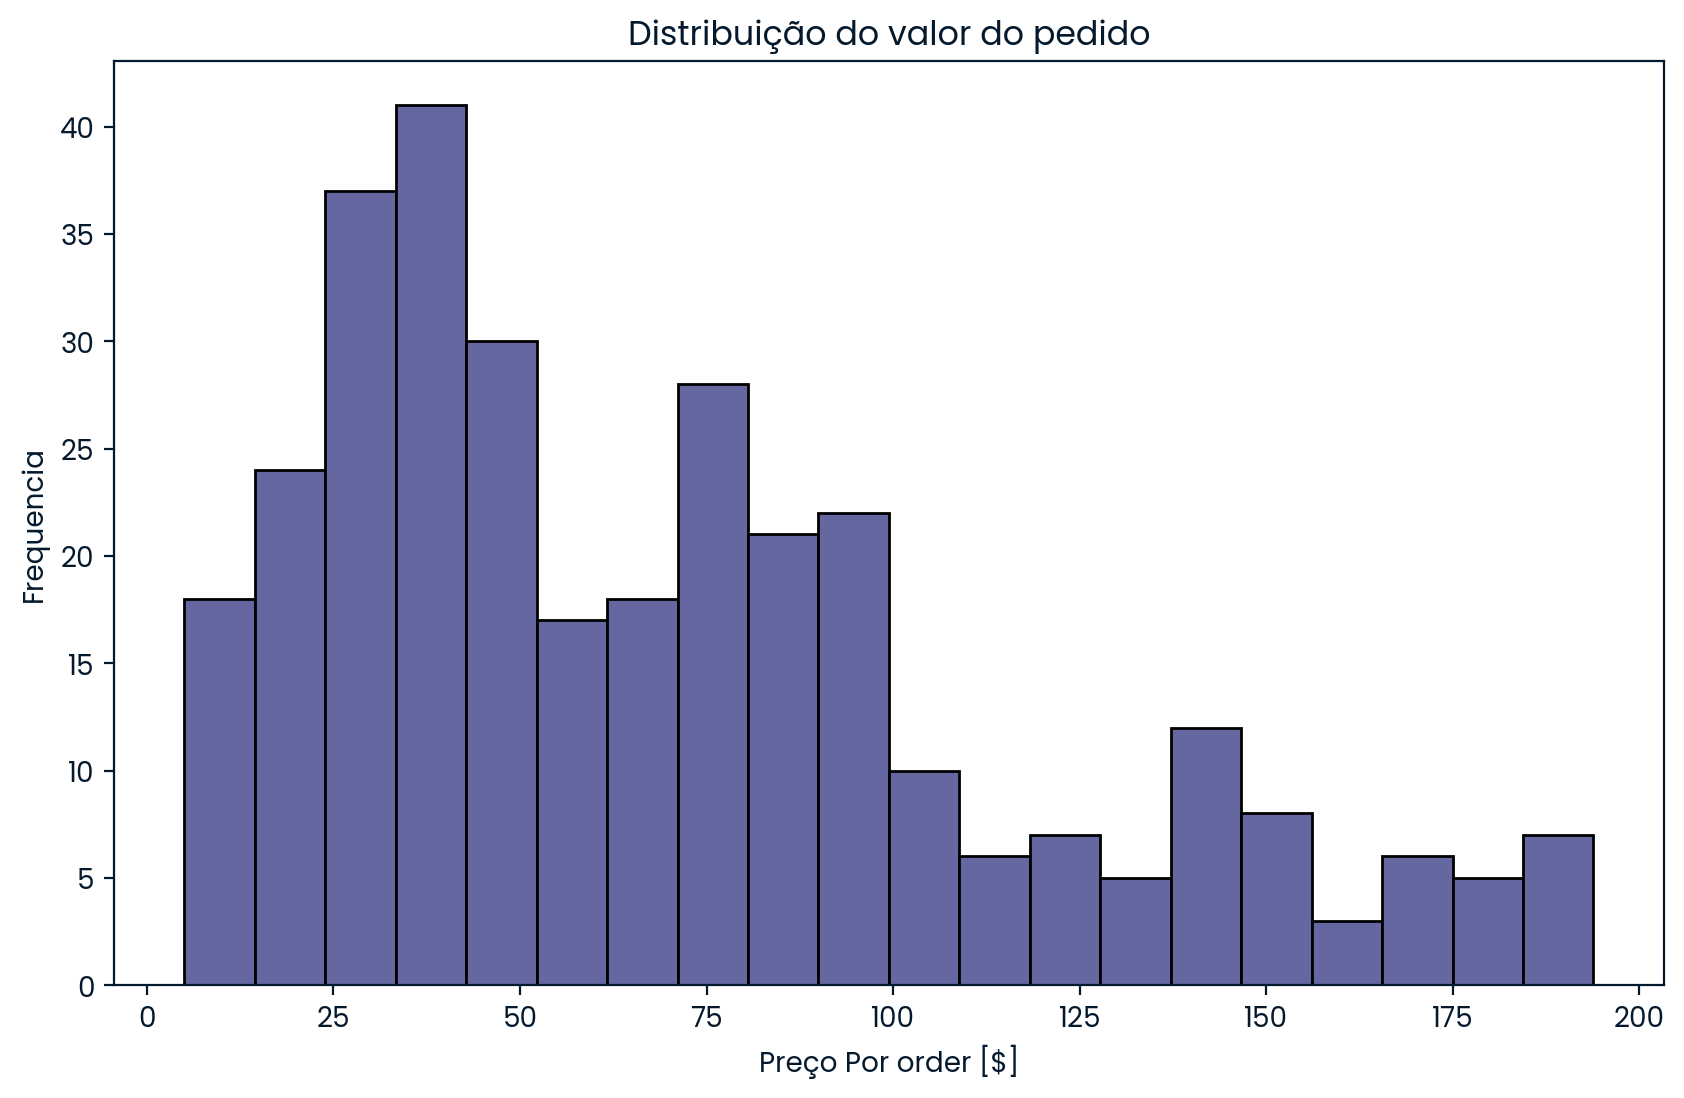

In [125]:
#  Calcula distribuição de valor dos pedidos, apenas pedidos completed

# Plot the histogram of total price per order
plt.figure(figsize=(10, 6))
plt.hist(orders_completed['total_revenue'], bins=20, edgecolor='black')

# Add labels and title
plt.xlabel('Preço Por order [$]')
plt.ylabel('Frequencia')
plt.title('Distribuição do valor do pedido completed')

# Show the plot
plt.show()

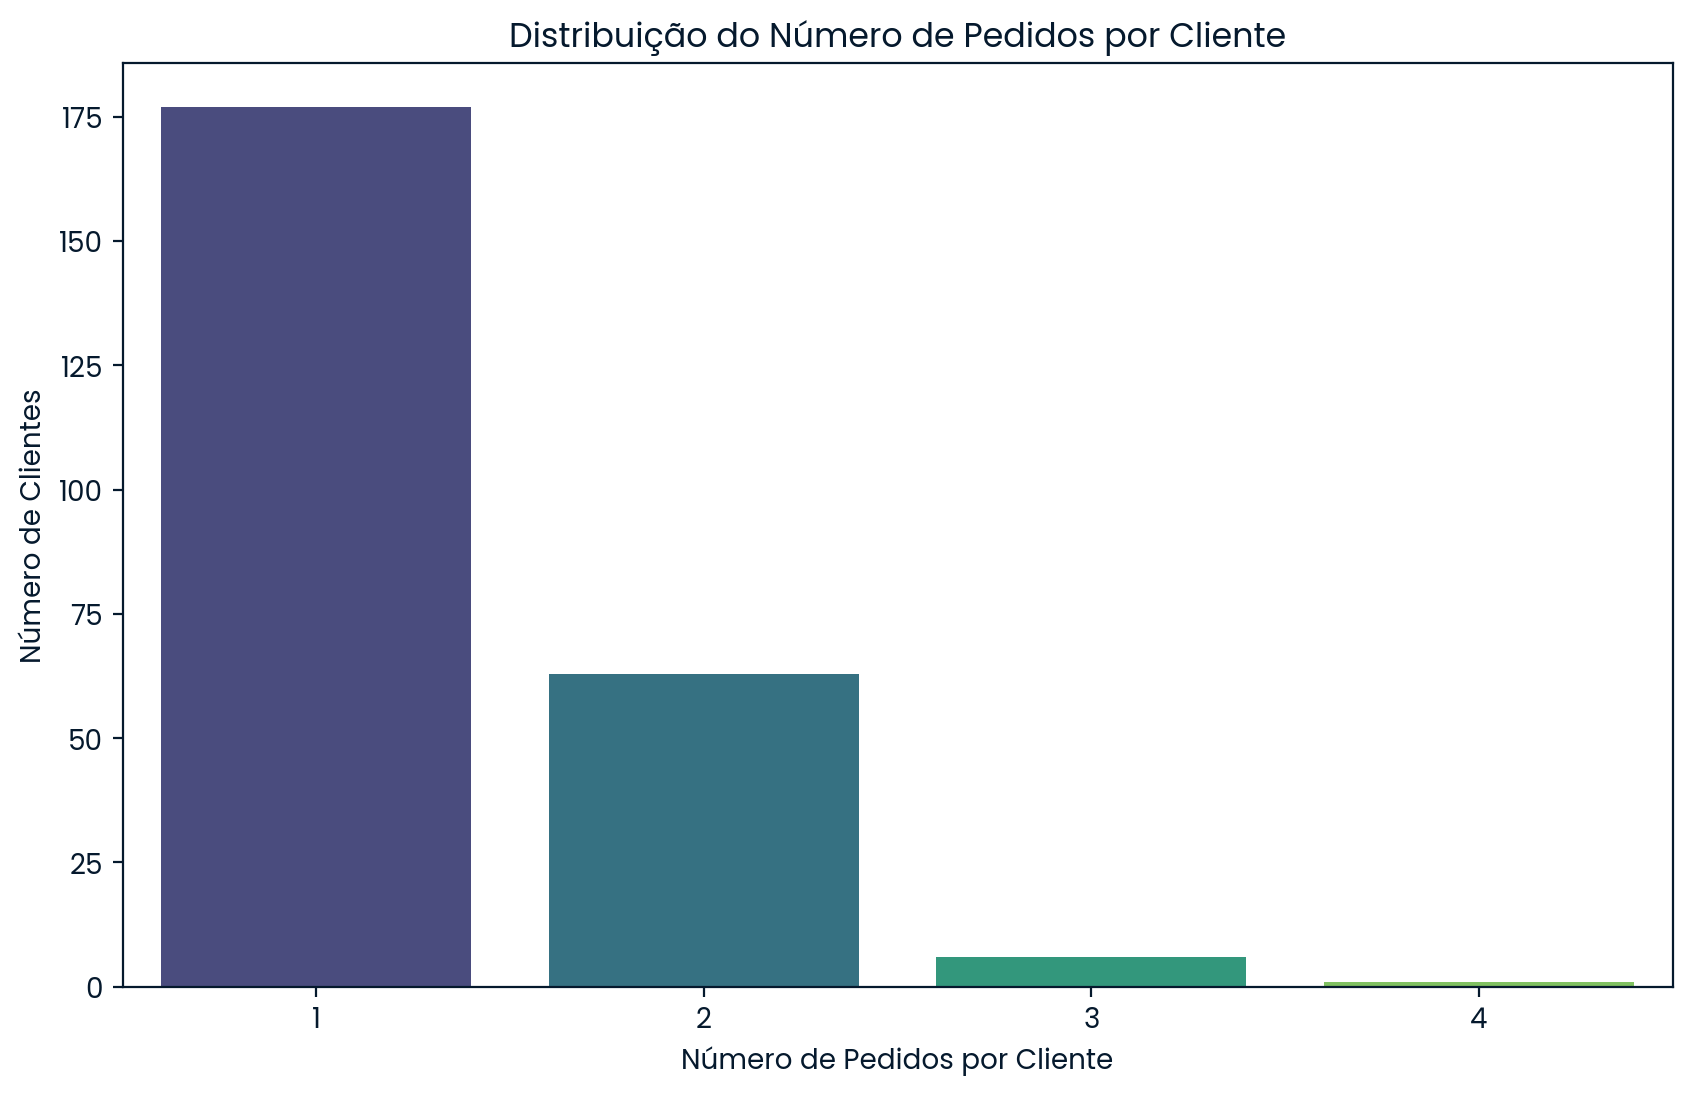

In [130]:
# Contar o número de pedidos por cliente
orders_per_customer = orders_completed.groupby('customer_id').size()

# Contar quantos clientes têm cada número de pedidos (frequência de pedidos)
order_distribution = orders_per_customer.value_counts().sort_index()

# Criar o barplot para a distribuição de pedidos por cliente
plt.figure(figsize=(10, 6))
sns.barplot(x=order_distribution.index, y=order_distribution.values, palette='viridis')

# Adicionar rótulos e título
plt.xlabel('Número de Pedidos por Cliente')
plt.ylabel('Número de Clientes')
plt.title('Distribuição do Número de Pedidos por Cliente')

# Mostrar o gráfico
plt.show()

## 8. Identificação de relações entre variáveis: Apresente sua metodologia.

In [132]:
corr_matrix = orders_full_info.corr()
print("Correlation matrix:")
corr_matrix

Correlation matrix:


,order_id,customer_id,product_id,quantity,price,year
order_id,1.000000,0.016346,-0.044327,-0.004908,-0.014753,NaN
customer_id,0.016346,1.000000,0.007262,0.012440,0.039216,NaN
product_id,-0.044327,0.007262,1.000000,-0.049383,0.052075,NaN
quantity,-0.004908,0.012440,-0.049383,1.000000,-0.041432,NaN
price,-0.014753,0.039216,0.052075,-0.041432,1.000000,NaN
year,NaN,NaN,NaN,NaN,NaN,NaN


## 9.Cálculo de percentis: 25º, 50º e 75º percentil do valor dos pedidos.

In [138]:
percentiles = np.percentile(orders_completed['total_revenue'], [25, 50, 75])
print(f'25th, 50th, and 75th percentiles do valor dos pedidos completos são: {percentiles}')

25th, 50th, and 75th percentiles do valor dos pedidos completos são: [34.04 59.22 93.14]
